In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten, BatchNormalization

from sklearn.model_selection import train_test_split

In [2]:
info = pd.read_csv("_info.csv")
info

,FileID,Negative,Typical,Atypical
0,0003b2210c64,0,1,0
1,00af6f8c2a3d,1,0,0
2,00c9033fbc2e,0,0,1
3,00e0ce73dac8,0,0,1
4,00f0a591f18a,0,1,0
...,...,...,...,...
1195,ff60a32aa049,0,0,1
1196,ff9666e69d19,0,1,0
1197,ff971972490d,1,0,0
1198,ffb804652089,1,0,0


In [3]:
y_OneHot = np.array(info[['Negative','Typical','Atypical']])
y_OneHot

array([[0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       ...,
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1]], dtype=int64)

In [4]:
fileids = info['FileID'].tolist()
X = []
for fileid in fileids:
    pixel_array = plt.imread("img/train_cut/{}.jpg".format(fileid))
    pixel_array = cv2.resize(pixel_array, (32,32))   # some size
    X.append([pixel_array])
    
X = np.array(X)
X = X.astype("float16")
# 檢查
print(X.shape)

(1200, 1, 32, 32)


# 訓練集 測試集

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y_OneHot, test_size=0.2, random_state=42)

In [6]:
def show_loss(_history):
    loss = _history.history['loss']
    val_loss = _history.history['val_loss']
    plt.plot(loss)
    plt.plot(val_loss)
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc="upper right")
    plt.show()
    
    # accuracy
    score = model.evaluate(X_test, y_test)
    print("test acc", score[1])
    

# CNN model

In [7]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(8,8), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(8,8), padding="same"))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=(8,8), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(8,8), padding="same"))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# 平坦層
model.add(Flatten())
# 隱藏層
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
# 輸出層
model.add(Dense(3, activation="softmax"))

In [11]:
model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])
_history = model.fit(x=X_train,
                    y=y_train,
                    batch_size=100,
                    validation_split=0.2,
                    epochs=100,
                    verbose=2)

Epoch 1/100
8/8 - 1s - loss: 0.9135 - accuracy: 0.5651 - val_loss: 1.1184 - val_accuracy: 0.3802 - 906ms/epoch - 113ms/step
Epoch 2/100
8/8 - 0s - loss: 0.8951 - accuracy: 0.5781 - val_loss: 1.1333 - val_accuracy: 0.3906 - 209ms/epoch - 26ms/step
Epoch 3/100
8/8 - 0s - loss: 0.9180 - accuracy: 0.5768 - val_loss: 1.2481 - val_accuracy: 0.3698 - 223ms/epoch - 28ms/step
Epoch 4/100
8/8 - 0s - loss: 0.8796 - accuracy: 0.5781 - val_loss: 1.2016 - val_accuracy: 0.4115 - 211ms/epoch - 26ms/step
Epoch 5/100
8/8 - 0s - loss: 0.8863 - accuracy: 0.5755 - val_loss: 1.1996 - val_accuracy: 0.4062 - 213ms/epoch - 27ms/step
Epoch 6/100
8/8 - 0s - loss: 0.8761 - accuracy: 0.6029 - val_loss: 1.0281 - val_accuracy: 0.4688 - 228ms/epoch - 29ms/step
Epoch 7/100
8/8 - 0s - loss: 0.8618 - accuracy: 0.6211 - val_loss: 1.1336 - val_accuracy: 0.3854 - 242ms/epoch - 30ms/step
Epoch 8/100
8/8 - 0s - loss: 0.8505 - accuracy: 0.5911 - val_loss: 1.0803 - val_accuracy: 0.4062 - 230ms/epoch - 29ms/step
Epoch 9/100
8/8

Epoch 68/100
8/8 - 0s - loss: 0.5716 - accuracy: 0.7591 - val_loss: 1.9308 - val_accuracy: 0.4115 - 252ms/epoch - 32ms/step
Epoch 69/100
8/8 - 0s - loss: 0.5786 - accuracy: 0.7552 - val_loss: 1.4560 - val_accuracy: 0.4792 - 231ms/epoch - 29ms/step
Epoch 70/100
8/8 - 0s - loss: 0.5364 - accuracy: 0.7591 - val_loss: 1.5941 - val_accuracy: 0.4271 - 245ms/epoch - 31ms/step
Epoch 71/100
8/8 - 0s - loss: 0.5548 - accuracy: 0.7552 - val_loss: 1.4599 - val_accuracy: 0.4688 - 213ms/epoch - 27ms/step
Epoch 72/100
8/8 - 0s - loss: 0.5583 - accuracy: 0.7747 - val_loss: 1.4128 - val_accuracy: 0.4531 - 244ms/epoch - 30ms/step
Epoch 73/100
8/8 - 0s - loss: 0.5353 - accuracy: 0.7734 - val_loss: 2.2234 - val_accuracy: 0.3333 - 256ms/epoch - 32ms/step
Epoch 74/100
8/8 - 0s - loss: 0.5222 - accuracy: 0.7826 - val_loss: 1.7239 - val_accuracy: 0.3542 - 228ms/epoch - 29ms/step
Epoch 75/100
8/8 - 0s - loss: 0.5257 - accuracy: 0.7669 - val_loss: 1.8787 - val_accuracy: 0.3542 - 214ms/epoch - 27ms/step
Epoch 76

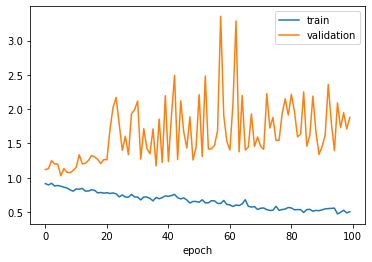

8/8 [==============================] - 0s 4ms/step - loss: 1.5448 - accuracy: 0.4917
test acc 0.49166667461395264


In [12]:
show_loss(_history)

In [13]:
model.save("model/cnn_20211116.md")

INFO:tensorflow:Assets written to: model/cnn_20211116.md\assets
